In [1]:
#Classification Algorithm : to predict the value of yes /no means use for
#Binary classification and multiclass classify
#1. Logistic Regression
#Work on insurance dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [3]:
#to load dataset
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

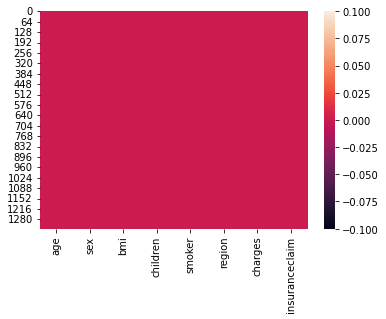

In [5]:
sns.heatmap(df.isnull())
plt.show()

In [6]:
df.dtypes #check datatypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [7]:
df.corr()#not required because the output is not continous numeric value

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


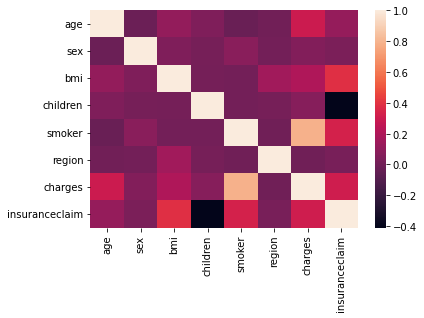

In [8]:
sns.heatmap(df.corr())
plt.show() #not required because the output is not continous numeric value

In [9]:
#select input and output
X=df.drop("insuranceclaim",axis=1)#selecting input variable from dataset
Y=df["insuranceclaim"] #selecting output variable

In [10]:
X.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [11]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3,random_state=1)

In [12]:
#applying scaling on 70% inut traing data and 30% input testing data
from sklearn.preprocessing import StandardScaler
#creating object of StandardScaler
ss=StandardScaler()
Xtrain=ss.fit_transform(Xtrain)
Xtest=ss.transform(Xtest)

In [13]:
#applying logistic regression
#call the class
from sklearn.linear_model import LogisticRegression

In [14]:
#creating object of LogisticRegression Class
lr=LogisticRegression()

In [15]:
#training the model with 70%data inbuilt method fit()
lr.fit(Xtrain,Ytrain)


LogisticRegression()

In [16]:
#testing the Model with 30% data , ML gives predicted output
Ypred=lr.predict(Xtest) #Y_pred=1/(1+exp(-X_test))

In [17]:
#Ytest=Actual O/P
#Ypred=predicted O/P
dic={"Actual Output":Ytest,"Predicted Output":Ypred}
df1=pd.DataFrame(dic)
df1.head(10)

,Actual Output,Predicted Output
559,1,1
1087,1,1
1020,1,1
460,0,0
802,0,0
298,1,1
481,1,1
616,1,1
763,1,0
750,1,1


In [18]:
#checking Score 
#score() := Inbuilt method of LogisticRegression class
lr.score(Xtest,Ytest)
#this score is also known as Accuracy score 
#most of time , accuracy score shows Good only

0.8805970149253731

In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(Ytest,Ypred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       157
           1       0.91      0.89      0.90       245

    accuracy                           0.88       402
   macro avg       0.87      0.88      0.88       402
weighted avg       0.88      0.88      0.88       402



# Confusion Matrix:

In [21]:
#confusion matrix() inbuilt class
from sklearn.metrics import confusion_matrix

In [22]:

print(confusion_matrix(Ytest,Ypred))

[[136  21]
 [ 27 218]]


In [23]:
#converting 2D array to !D array using ravel()
confusion_matrix(Ytest,Ypred).ravel()

array([136,  21,  27, 218], dtype=int64)

In [24]:
TP,FP,FN,TN=confusion_matrix(Ytest,Ypred).ravel() #flattern()
print("True +ve:",TP)
print("True -ve:" ,TN)
print("False +ve:",FP)
print("False -ve:",FN)

True +ve: 136
True -ve: 218
False +ve: 21
False -ve: 27


In [25]:
#Data Analysis on insurance.csv dataset manually with the help of visualisation
#work on feature selection 
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [26]:
#we have input featutres : categorical data means categorical columns
#(object type) : sex ,children,smoker, and region  : apply countplot() 
#for data analysis (countplot means frequency graph)

#and Numerical columns : age,bmi,charges apply scatterplot()

1    783
0    555
Name: insuranceclaim, dtype: int64


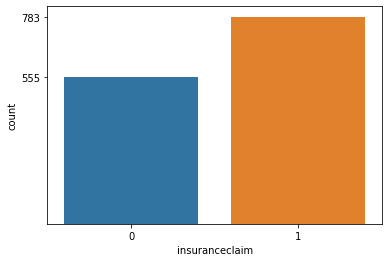

In [27]:
# first how many customers claim insurance and others who don't claim
f=df["insuranceclaim"].value_counts()
print(f)
#visualizaion
sns.countplot(data=df,x="insuranceclaim")
plt.yticks(f)
plt.show()

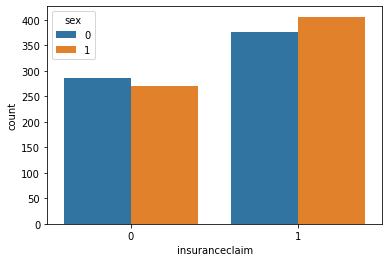

In [28]:
#Check Is input feature : sex is important to predict output
#Here sex : categorical type and target : also categorical
sns.countplot(data=df,x="insuranceclaim",hue="sex") #always given in hue input
plt.show()

In [29]:
#hence we conclude that sex is not important to predict the output

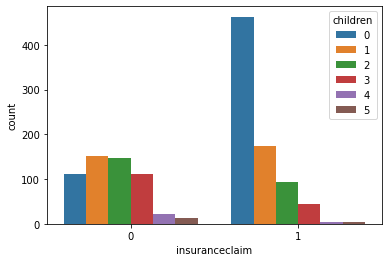

In [30]:
#take next column as children with o/p insurance claim
sns.countplot(data=df,x="insuranceclaim",hue="children") #always given in hue input
plt.show()

In [31]:
#hence we conclude that children is important to pred outut

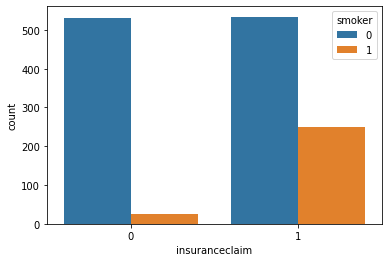

In [32]:
#take next column as smoker with o/p insurance claim
sns.countplot(data=df,x="insuranceclaim",hue="smoker") #always given in hue input
plt.show()

In [33]:
#hence we conclude that smoker is important to pred outut

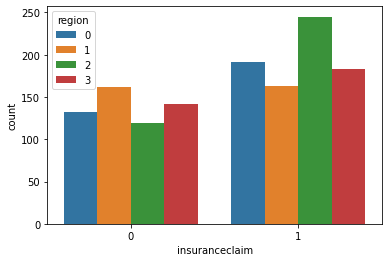

In [34]:
#take next column as region with o/p insurance claim
sns.countplot(data=df,x="insuranceclaim",hue="region") #always given in hue input
plt.show()

In [35]:
#hence we conclude that region is not important to pred outut

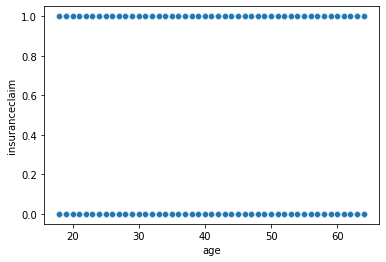

In [36]:
#We are seeing with Numerical columns : age,bmi,charges apply scatterplot()
#Check Is input feature : age is important to predict output
#Here age : Numerical type and target : also categorical
sns.scatterplot(data=df,x="age",y="insuranceclaim")
plt.show()

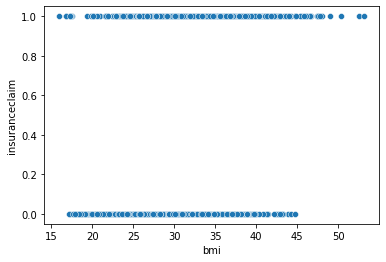

In [37]:
sns.scatterplot(data=df,x="bmi",y="insuranceclaim")
plt.show()

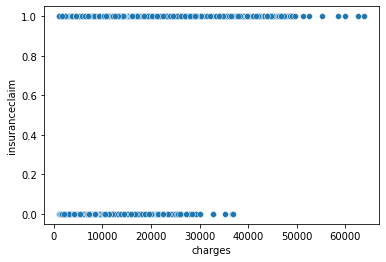

In [38]:
sns.scatterplot(data=df,x="charges",y="insuranceclaim")
plt.show()

In [39]:
#we concluded : bmi and chargers are imp to predict the o/p

#We concluded after preprocessing the dataset: 
#imp features bmi,charges,smoker,children with target means output
#=insuranceclaim
X=df[["bmi","charges","children","smoker"]]
Y=df["insuranceclaim"]

# Classification Algorithm : DicissionTreeClassifier


In [40]:
#load dataset again
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [41]:
#check null values
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [42]:
df.dtypes #checking datatypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [43]:
#select input and output
X=df.drop("insuranceclaim",axis=1)#selecting input variable from dataset
Y=df["insuranceclaim"] #selecting output variable

In [44]:
#ratio of train test split 70 and 30 ratio
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3,random_state=1)

In [45]:
#applying standard scaler on 70% input training data and 30% input testing data
#creating object of standardscaler
ss=StandardScaler()
Xtrain=ss.fit_transform(Xtrain)
Xtest=ss.transform(Xtest)

In [48]:
#perform with the help of decision tree classifier
#calling the class
from sklearn.tree import DecisionTreeClassifier

In [50]:
#creating Object
dt=DecisionTreeClassifier() #bydefault uses Ginni Tree Index : 1-P^2-q^2

In [51]:
#training the model
dt.fit(Xtrain,Ytrain)

DecisionTreeClassifier()

In [52]:
#testing the model
Ypred=dt.predict(Xtest)

In [54]:
#printing the classification Report
print(classification_report(Ytest,Ypred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       157
           1       0.99      0.99      0.99       245

    accuracy                           0.99       402
   macro avg       0.98      0.98      0.98       402
weighted avg       0.99      0.99      0.99       402



In [56]:
#confusion matrix
print(confusion_matrix(Ytest,Ypred))


[[154   3]
 [  3 242]]


In [59]:
IG=dt.feature_importances_
IG

array([0.0701922 , 0.        , 0.42187374, 0.3335719 , 0.16581384,
       0.        , 0.00854832])

In [60]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [61]:
dic={"Columns":X.columns,"Information Gain":IG}
df1=pd.DataFrame(dic)
df1

,Columns,Information Gain
0,age,0.070192
1,sex,0.000000
2,bmi,0.421874
3,children,0.333572
4,smoker,0.165814
5,region,0.000000
6,charges,0.008548


In [65]:
#inbuilt method sort()
df1.sort_values("Information Gain",ascending=False)
#to arrange record in decending order accrding to Information gain column

,Columns,Information Gain
2,bmi,0.421874
3,children,0.333572
4,smoker,0.165814
0,age,0.070192
6,charges,0.008548
1,sex,0.000000
5,region,0.000000


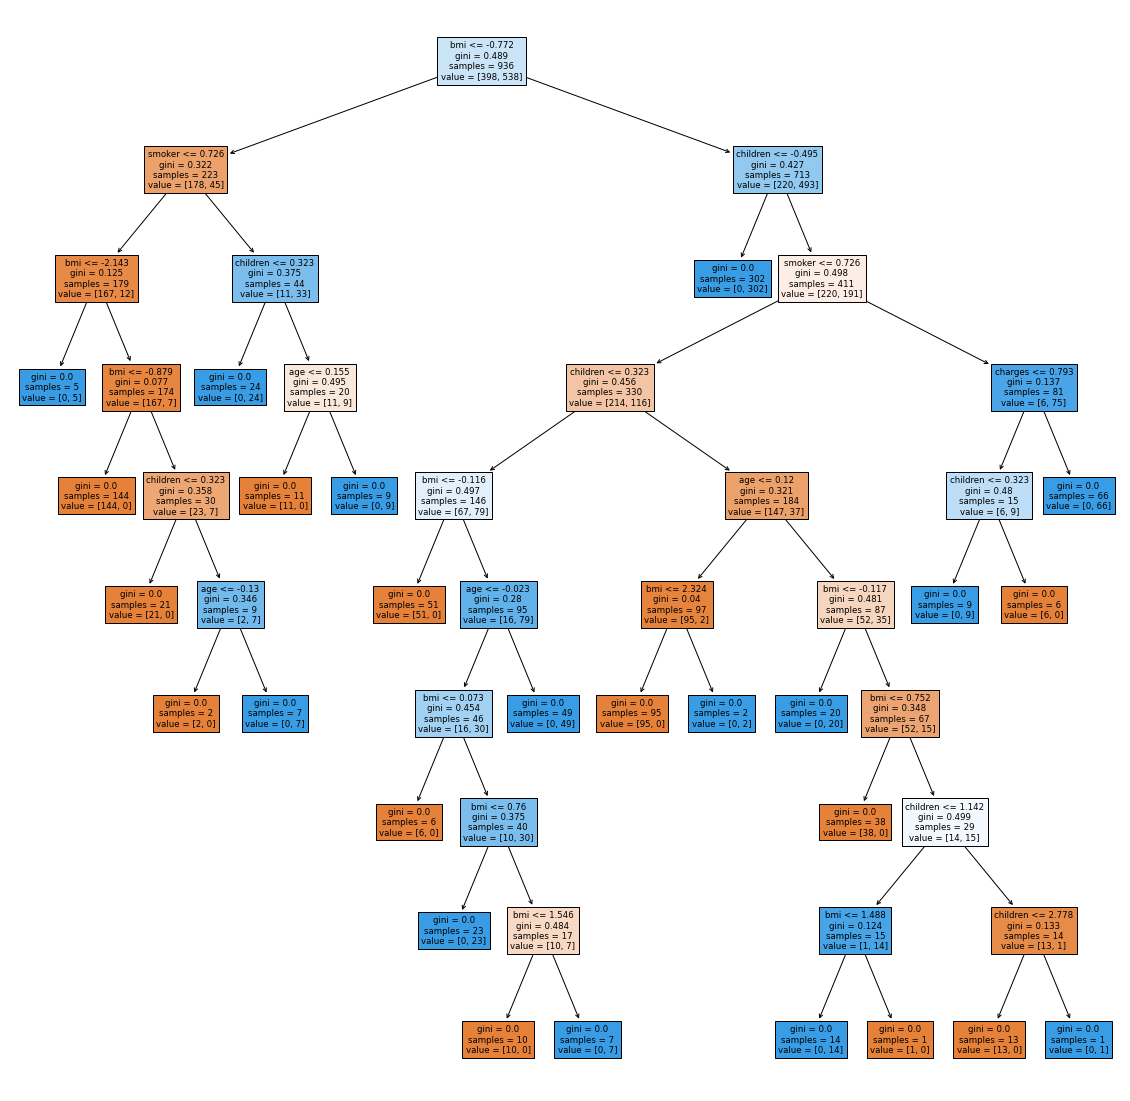

In [67]:
#creating a tree
from sklearn import tree
f=X.columns #here f is the user defined object which will hold all the values
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=f,filled=True)